### ¿Que es la quimioinformática ?

Es el conjunto de recursos informáticos para transformar DATOS en INFORMACION e información en CONOCIMIENTO, con el propósito de tomar más rápidas y mejores decisiones en el ámbito de la identificación y optimización de fármacos. 

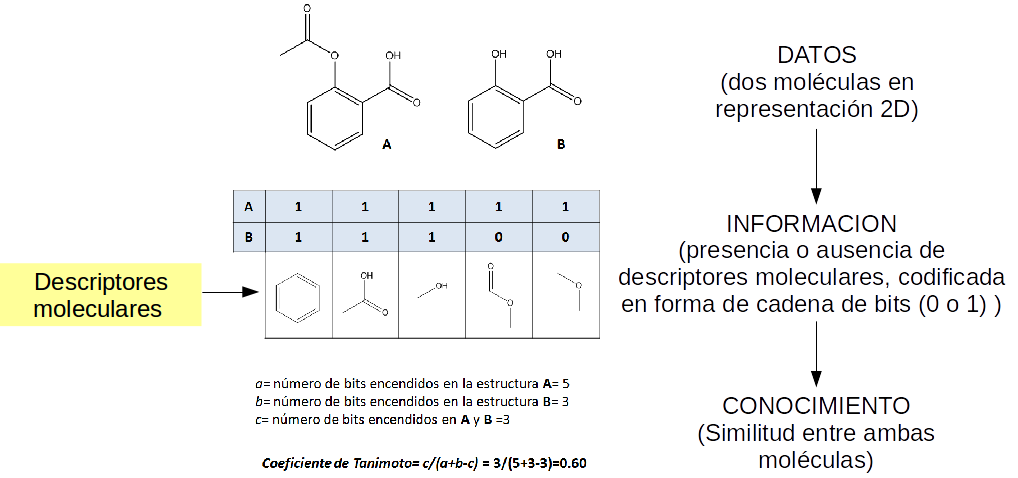

Un aspecto importante en quimioinformática es como representamos las moléculas de manera de poder acceder rápidamente a la información contenida en ellas, mediante ordenadores. 
Una representación molecular reduce la dimensionalidad de una estructura molecular reteniendo al mismo tiempo la información química importante. Por ejemplo, una fórmula química (ej. $C_6$$H_6$) reduce una molécula tridimensional a una cadena de caracteres, pero es una entrada ambigua para un algoritmo quimioinformático. Es decir que la estructura atómica y molecular debe poder convertirse a un formato legible por máquina. 

### Representación 1-D, 2-D y 3-D de moléculas

En quimioinformática, la información estructural de una molécula se puede dar como una cadena 1D de caracteres (denominada SMILES), un dibujo 2D (topología molecular) o una representación 3D. El tipo de representación dependerá del tipo de propiedad molecular que se quiera predecir. Las herramientas quimioinformáticas permiten convertir rápidamente de una representación en otra.  

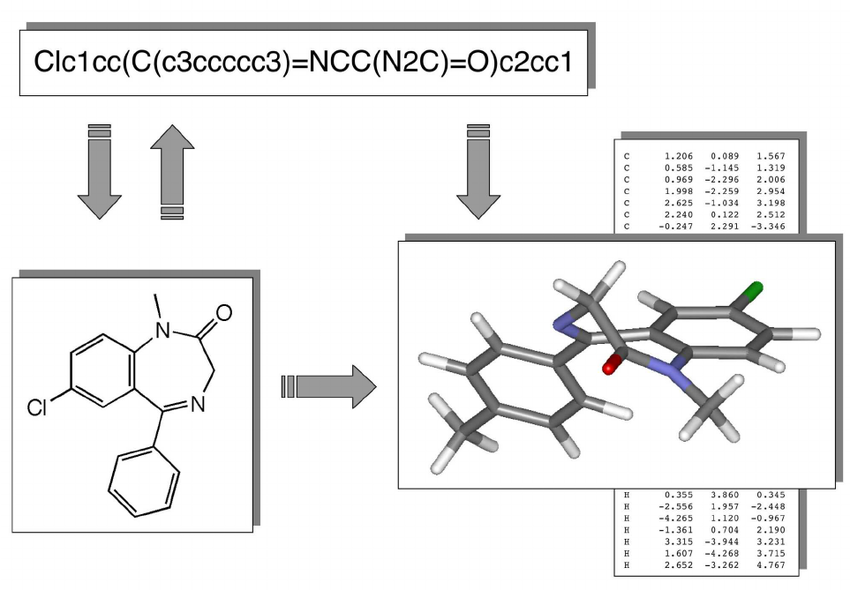

### SMILES

Es la representación más sencilla de una molécula. Se escribe la molécula como una cadena de caracteres en una sola línea de texto, siguiendo una serie de reglas: 
- Los diferentes elementos químicos se representan mediante sus símbolos químicos, generalmente se ignora el hidrógeno. 
- Los enlaces simples no se muestran; para enlaces dobles, triples y cuádruples se usa '=', '#', '$', respectivamente. 
- Los átomos que están enlazados se escriben adyacentes.  
- Las estructuras de anillo se escriben rompiendo cada anillo en un punto arbitrario para crear una estructura acíclica y agregando etiquetas numéricas de cierre de anillo para mostrar la conectividad entre átomos no adyacentes.
- La aromacidad se ilustra comúnmente escribiendo los átomos constituyentes B, C, N, O, P y S en minúsculas b, c, n, o, p y s, respectivamente.

Por ejemplo para el ciclohexano: 


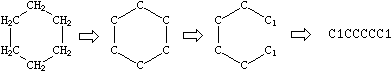

Puede encontrar mas detalles sobre como se construyen las SMILES de moléculas en https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html. 
Sin en embargo, generalmente no es necesario construirlas a mano sinó que se descargan directamente de las bases de datos de información química como PubChem, CHEMBL, BindindDB, ZINC, etc.    

### MOL y SDF
Es un formato de archivo que guarda información sobre los átomos, enlaces, conectividad y coordenadas de una molécula.
Un archivo MOL típico consta de cierta información de ENCABEZADO, seguido de un bloque de información de los ATOMOS, luego un bloque para los ENLACES, seguidos de secciones para información más compleja. Las representaciones MOL pueden contener información sobre la estructura 2D o 3D de la molécula. Este formato está tan extendido que la mayoría de los sistemas de software de quimioinformática pueden leerlo.

La diferencia con el formato SDF (Structure Data Files) es que éste generalmente contine muchos compuestos en formato MOL puestos en un único archivo, junto con alguna información adicional sobre los compuestos. Generalmente se usan para distribuir bibliotecas de compuestos.   

Ejemplo de un archivo MOL para el ácido benzoico en representación 2D:

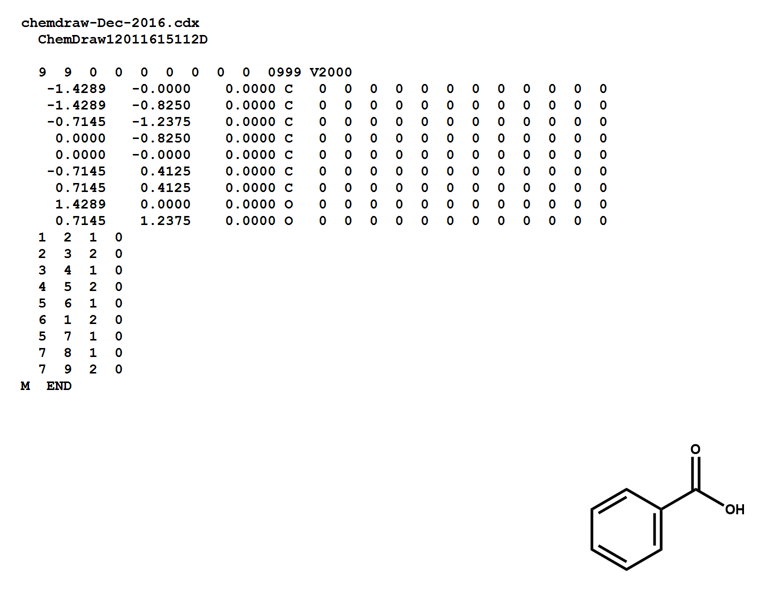


### RDKit
RDKit es un conjunto de herramientas de quimioinformática para Python. 
Para **instalar** rdkit en un entorno de conda tipee:

In [15]:
## Descomentar la siguiente linea en caso de no tener aún instalado RDKit
#!conda install -y -c rdkit rdkit


La funcionalidad molecular básica de RDKit se encuentra en el módulo rdkit.Chem:

In [1]:
from rdkit import Chem

Además necesitamos importar módulos especiales para dibujar las moléculas en el cuaderno interactivo:

In [9]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules

Ahora creemos la molécula de ibuprofeno a partir de su representación 1D en SMILES: 
    

In [6]:
ibu = Chem.MolFromSmiles('CC(C)Cc1ccc(cc1)C(C)C(=O)O')


Mostremos la representación 2D de la molécula de ibuprofeno en el cuaderno:

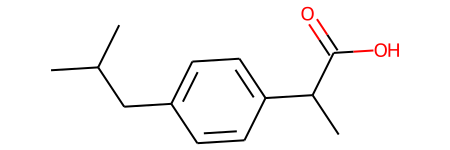

In [8]:
ibu

Una vez creado el objeto ibu, podemos consultar por varias de sus propiedades, por ejemplo el número de átomos de la molécula: 

In [10]:
ibu.GetNumAtoms()

15

Vemos que los átomos de hidrógeno están implícitos en esta representación de la molécula, esto es porque no se incluyen en la representación de SMILES. 
Podemos hacer explícitos los átomos de hidrógeno agregándolos (y creando una nueva molécula en el proceso). Necesitamos más funciones que las provistas en el módulo base Chem, por lo que necesitamos importar la funcionalidad ampliada de AllChem.

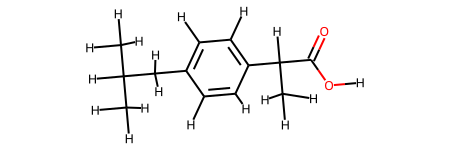

In [13]:
from rdkit.Chem import AllChem 
ibuH = AllChem.AddHs(ibu)
ibuH

A continuación, veamos si el Ibuprofeno cumple con las regla de los 5 de Lipinski (RO5). 

<div class="alert alert-block alert-info">
La RO5 es una regla empírica que permite evaluar cualitativamente cómo de adecuado podría resultar un compuesto químico para cumplir alguna determinada función farmacológica o actividad biológica una vez que es ingerido como medicamento para consumo <b>oral</b> en seres humanos. Esta regla fue formulada por Christopher A. Lipinski en el año 1997, basado en la observación de que la mayoría de los compuestos químicos utilizados en medicamentos son moléculas relativamente pequeñas y lipofílicas.
La regla describe las propiedades moleculares que tienen importancia farmacocinética en el cuerpo humano, incluyendo la absorción, distribución, metabolismo, y excreción ("ADME"). 
Tal y como lo indica la regla de Lipinski, en general, un principio activo y para que sea posible su administración por vía oral no debe violar más de una de las siguientes consideraciones:

<ul>
<li>No debe contener más de 5 donadores de hidrógeno (átomos de nitrógeno u oxígeno con al menos un átomo de hidrógeno).</li>
<li>No debe contener más de 10 aceptores de hidrógeno (átomos de nitrógeno, oxígeno o flúor).</li>
<li>Debe poseer un peso molecular inferior a 500.</li>
<li>Debe poseer un coeficiente de reparto octanol-agua (log P) inferior a 5. </li>
</ul>

Nótese que todos los números mencionados en estas condiciones son múltiplos de cinco, lo cual es el origen del nombre de esta regla.

</div>

Importamos el modulo rdkit.Chem.Descriptors que permite calcular otras propiedades moleculares: 

In [32]:
from rdkit.Chem import Descriptors
print("El numero de aceptores de hidrógeno es: ",Descriptors.NumHAcceptors(ibu))
print("El numero de dadores de hidrógeno es: ",Descriptors.NumHDonors(ibu))
print("El coeficiente de reparto octanol-agua, LogP es: ", Descriptors.MolLogP(ibu))
print("El peso molecular es: ", Descriptors.MolWt(ibu))

El numero de aceptores de hidrógeno es:  1
El numero de dadores de hidrógeno es:  1
El coeficiente de reparto octanol-agua, LogP es:  3.073200000000001
El peso molecular es:  206.28499999999997


Como era de esperar, el ibuprofeno cumple con las RO5 de Lipinski. 


### Similaridad Química 

La noción de similaridad química (o similaridad molecular), según el cual las moléculas se agrupan según sus propiedades fisico-químicas, juega un papel importante en la predicción de las propiedades de moléculas y en particular en estudios de diseño de fármacos. 

Estos estudios se basan en la premisa de que compuestos similares tendrán propiedades similares. 

La idea es diseñar compuestos "similares" a los compuestos activos conocidos con la esperanza de encontrar estructuras moleculares alternativas que mantengan la actividad, pero al mismo tiempo mejorando, por ejempo su biodisponibilidad. 

En la práctica estos estudios de diseño de fármacos comienzan realizando una busqueda por similaridad en bases de datos de compuestos químicos. 

El cálculo de la similaridad de dos moléculas cualesquiera se logra comparando sus **fingerprints moleculares**. Estas fingerprints (fps) se componen de información estructural sobre la molécula que ha sido codificada como una serie de bits.

El cálculo de la similaridad se realiza en **2 etapas**, primero se calculan las fps de las moléculas en cuestion y luego se comparan las fps con un **coeficiente de similaridad**, para finalmente producir la medida de similaridad. 

Existen diferentes tipos de fps: basadas en subestructura (PubChemFP, MACCS, etc) y en topología (APFP, GraphFP, Morgan, ECFP, etc). Aquí presentamos dos fps de uso común: **MACCS keys** y **fingerprints de Morgan** 

### MACCS keys

Las MACCS (del ingles Molecular ACCess System), también denominadas claves estructurales MACCS (keys), constan de 166 fragmentos estructurales predefinidos. Cada posición consulta la presencia o ausencia de un fragmento o "key" estructural en particular.
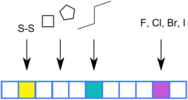

### Fingerprints de Morgan 

Esta familia de fps están basadas en el algoritmo de Morgan. Los "bits" corresponden a los entornos circulares de cada átomo en una molécula. El número de atomos y enlaces circundantes se define por el radio. Otras fps muy populares que son derivadas usando una variante del algoritmo de Morgan son las ECFP (por Extended connectivity fingerprints). 

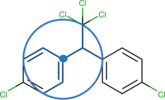


### Medida de similaridad molecular 

Una vez calculadas las fps, la similaridad molecular puede cuantificarse con una serie de coeficientes de similaridad, el mas conocido es el coefiente de Tanimoto: 

#### Coeficiente de Tanimoto 

$$T _{c}(A,B) = \frac{c}{a+b-c}$$

- a: número de caracteristicas presentes en la molécula A 
- b: número de caracteristicas presentes en la molécula B 
- c: número de caracteristicas compartidas por A y B


Veamos como calcular las fps y realizar las medidas de similaridad en **RDKit**.
Primero definamos y dibujemos 8 moléculas de ejemplo. 

In [6]:
# Molecules in SMILES format
molecule_smiles = [
    "CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O",
    "CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C",
    "C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl",
    "CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC",
    "C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C",
    "CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O",
    "CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O",
]

# List of molecule names
molecule_names = [
    "Doxycycline",
    "Amoxicilline",
    "Furosemide",
    "Glycol dilaurate",
    "Hydrochlorothiazide",
    "Isotretinoin",
    "Tetracycline",
    "Hemi-cycline D",
]

Convertimos los SMILES en objetos Molecula de rdkit y luego las visualizamos con el módulo Draw en rdkit. 
Nótese que en este caso, como tenemos una lista de 8 SMILES, es conveniente utilizar un **for loop** para convertir todas ellas de una sola vez.

In [7]:
from rdkit import Chem 
ms = [Chem.MolFromSmiles(x) for x in molecule_smiles]

Para graficar las 8 moléculas en una grilla usamos la funcion MolsToGridImage del modulo Draw.Ademas especificamos la los nombres de las moléculas proporcionados en la lista molecule_names:

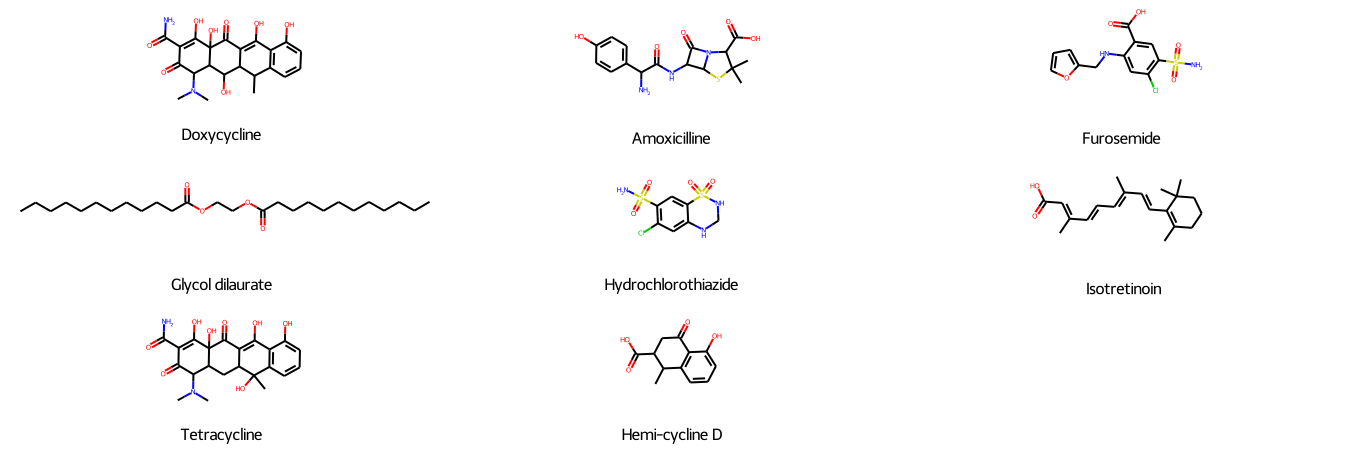

In [10]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(
    ms,
    molsPerRow=3,
    subImgSize=(450, 150),
    legends=molecule_names,
)

Ahora calculemos la similaridad entre estas moléculas. Tomemos de ejemplo el antibiótico Doxiciclina y calculemos sus MACCS fingerprints.  

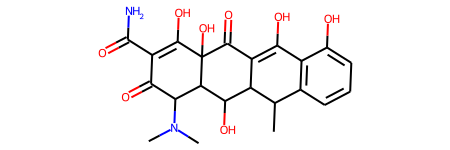

In [16]:
molecule1 = ms[0]
molecule1

In [20]:
from rdkit.Chem import MACCSkeys
maccs_fp1 = MACCSkeys.GenMACCSKeys(molecule1)

La correspodiente cadena de bits de la fingerprint asociada a esta molécula será: 

In [21]:
maccs_fp1.ToBitString()

'00000000000000000000000000100000000000000000000000100110000000000010000010101000000011100100110101010100010000101100010000100001000101001001111111101111101011111111110'

Ahora calculemos la fp de otra molécula, por ejemplo Amoxicilina y a continuación calculemos la similaridad entre ambas, con el coeficiente de Tanimoto:

In [22]:
molecule2 = ms[1]
maccs_fp2 = MACCSkeys.GenMACCSKeys(molecule2)

from rdkit import DataStructs
DataStructs.FingerprintSimilarity(maccs_fp1,maccs_fp2)

0.5909090909090909

El indice de tanimoto va de 0 para moléculas sin ninguna similaridad a 1 para moléculas identicas. 

Ahora calculemos las fps de todas las moléculas:

In [26]:
maccs_fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

A continuación, queremos comparar una molécula de consulta (query) con nuestra lista de moléculas. Para ello usamos la función BulkTanimotoSimilarity: 

In [32]:
# Define molecule query and list
molecule_query = maccs_fp1                # dociciclina 
molecule_list = maccs_fps                 # todas 

# Calculate similarty values between query and list elements
molecule_sim = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)

Veamos esta información en un Data frame de Pandas. Agreguemos dos columnas, una para el nombre de la molécula y otra pas sus correspodientes valores de similaridad con respecto a la molécula de consulta. Además, para que sea mas fácil la interpretación de los datos, ordenemos los filas de la tabla de mayor a menor indice de similaridad:  

In [34]:
import pandas as pd
table = pd.DataFrame()
table['name'] = molecule_names
table['similarity'] = molecule_sim
table.sort_values('similarity', ascending=False)

name  similarity
0          Doxycycline    1.000000
6         Tetracycline    0.928571
1         Amoxicilline    0.590909
7       Hemi-cycline D    0.403509
2           Furosemide    0.321839
4  Hydrochlorothiazide    0.306818
5         Isotretinoin    0.288136
3     Glycol dilaurate    0.149254

La Tetraciclina es la molécula mas similar a nuestra molecula de consulta Dociciclina, lo cual tiene sentido porque ambos pertenecen a la misma familia de antibioticos.  

### Cribado Virtual 
Ahora que hemos aprendido a calcular las fingerprints y la similitud entre ellas, aplicarán este conocimiento para buscar compuestos similares a una molécula de consulta, pero en una base de datos de compuestos "de verdad"!. 

Supongamos que una empresa farmacéutica está diseñando un nuevo fármaco para cancer de mamas. Debido a que la síntesis de nuevos medicamentos es muy costosa, quieren comenzar el proceso con las mejores moléculas "semilla", las que tienen la mayor probabilidad de éxito. 

Una posibilidad sería tomar una molécula que tenga propiedades conocidas contra el cancer de mamas y realizar una búsqueda de similitud en una gran base de datos de moléculas “virtuales”, lo que se conoce como **Cribado Virtual**. Existe una buena posibilidad de que las moléculas mas similares también tengan las propiedades deseadas. De esta forma, la empresa inicia el costoso y laborioso proceso de descubrimiento de fármacos con las mejores "pistas".

Para ser mas concretos, usaremos como consulta (query) al conocido inhibidor del Receptor del Factor de Crecimiento Epidérmico (EGFR) Gefitinib, usado para el tratamiento de ciertos cánceres de mama, y buscaremos moléculas similares en una base de datos de inhibidores conocidos de EGFR. 

En campañas de Cribado Virtual prospectivo (como en el ejemplo de la compañía farmacéutica), la busqueda de realiza sobre bases de datos de compuestos de actividad desconocida, pero en este ejercicio utilizaremos un set de datos de inhibidores conocidos de EGFR, de manera de asegurarnos de obtener buenos resultados. 

El set de datos con el que trabajaremos consiste en una colección de inhibidores del EGFR que fue compilada a partir de la base de datos pública CHEMBL (https://www.ebi.ac.uk/chembl/). El set de datos fue previamente filtrado por la regla de los cinco de Lipinski (compuestos que no cumplian las RO5 fueron descartados) de manera de asegurarnos que los compuestos seleccionados en el Cribado Virtual tengan las propiedades adecuadas para biodisponibilidad por vía oral.  

Incialmente importamos el set de datos en un Data Frame de Pandas, desde un archivo CSV.  

In [39]:
molecule_dataset = pd.read_csv("data/EGFR_compounds_lipinski.csv",
    usecols=["molecule_chembl_id", "smiles", "pIC50"])

print(f"Número de moléculas en el dataset: {len(molecule_dataset)}")
molecule_dataset.head(5)

Número de moléculas en el dataset: 4635


molecule_chembl_id                               smiles      pIC50
0        CHEMBL63786    Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1  11.522879
1        CHEMBL35820  CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC  11.221849
2        CHEMBL53711   CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1  11.221849
3        CHEMBL66031  Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1  11.096910
4        CHEMBL53753      CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1  11.096910

pIC50 es una medida de la actividad del compuesto como inhibidor de EGFR. 
Valores mayores de pIC50 indican una potencia exponencialmente mayor. 

<div class="alert alert-block alert-warning">
<b> Actividad </b>


<ul>

<li> Para la molécula de consulta Gefitinib, genere el objeto Molécula de RDKit, a partir de su representación 1D o SMILES "COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC(Cl)=C(F)C=C3)=NC=NC2=C1". Dibuje la representación 2D de la molécula.</li>
<br> 

<li> Verifique que el Gefitinib cumple las RO5 de Lipinski.</li>
<br> 

<li> Genere la (MACCS) fingerprint de la molecula de consulta.</li>
<br> 

<li> Genere las (MACCS) fingerprints de las moleculas del set de datos.</li>
<br>     

<li> Calcule la similaridad de Tanimoto (Tc) entre la molécula de consulta (Gefitinib) y todas las moléculas de nuestro conjunto de datos .</li>
<br>     

<li> Agregue una columna en la tabla "molecule_dataset" que muestre los valores de similaridad calculados. Ordenelos de mayor a menor. </li>
<br>     

<li> ¿Cuantas moléculas del set de datos presentan un Tc > 0.85 con respecto a Gefitinib? ¿Como se compara este número con respecto al número total de compuestos en el set de datos?. </li>
<br>     

</ul>

</div>



In [1]:
# ESCRIBA SUS RESPUESTAS AQUI

### Referencias 

* https://www.rdkit.org/docs/GettingStartedInPython.html
* https://www.rdkit.org/docs/Cookbook.html
* https://github.com/volkamerlab/teachopencadd